<a href="https://colab.research.google.com/github/luisbisaro/pandas.datasets/blob/main/C3_metricas_aprendizaje_no_sup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_________________________________________________________________
________________________________________________________________
###**Validación Cruzada k-fold (k-fold Cross-Validation): (SUPERVISADO)**

###**Definición:**
La validación cruzada k-fold es una técnica utilizada para evaluar el rendimiento de un modelo de aprendizaje automático cuando se dispone de un conjunto de datos limitado. Divide el conjunto de datos en k partes (llamadas "folds") de igual tamaño. Luego, se entrena y evalúa el modelo k veces, cada vez utilizando una combinación diferente de k-1 folds para entrenar y el fold restante para evaluar. Finalmente, se promedian los resultados de las k iteraciones para obtener una estimación más robusta del rendimiento del modelo.
###**Explicación:**
La validación cruzada k-fold es útil para evaluar la capacidad de generalización de un modelo y detectar problemas de sobreajuste o subajuste. Ayuda a estimar cómo se comportaría el modelo en datos no vistos. Al utilizar múltiples divisiones de los datos, se reduce el riesgo de que la evaluación del modelo dependa en gran medida de una partición específica del conjunto de datos.





####**Sentido Matemático:**
En la validación cruzada k-fold, dividimos un conjunto de datos en k particiones (folds) del mismo tamaño. Luego, realizamos k iteraciones, en cada una de las cuales entrenamos el modelo en k-1 de las particiones y lo evaluamos en la partición restante. Esto se traduce en k conjuntos de entrenamiento y k conjuntos de prueba diferentes. Calculamos la métrica de rendimiento en cada iteración y luego promediamos estas métricas para obtener una evaluación más robusta del rendimiento del modelo.




In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Cargar un conjunto de datos (en este caso, el conjunto de datos Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Crear un modelo de SVM de kernel lineal
svm = SVC(kernel='linear')

# Realizar validación cruzada k-fold (en este caso, k=5)
scores = cross_val_score(svm, X, y, cv=5)

# Imprimir las puntuaciones de validación cruzada
print("Puntuaciones de validación cruzada:", scores)
print("Puntuación promedio:", scores.mean())


__________________________________________________________________
_________________________________________________________________
_________________________________________________________________
________________________________________________________________

##Algunas Métricas para Clasificadores

____________________________________________________________________
___________________________________________________________________
### **La matriz de confusión**
###Es una herramienta fundamental en Machine Learning para evaluar el rendimiento de un modelo de clasificación. Proporciona una representación visual de cómo se están realizando las predicciones en comparación con los valores reales en un problema de clasificación. La matriz de confusión se utiliza principalmente en problemas de clasificación binaria, aunque también se puede extender a problemas de clasificación multiclase.

###La **matriz de confusión** se construye a partir de cuatro valores clave:

###**Verdaderos positivos (True Positives - TP):** Representa los casos en los que el modelo predijo correctamente una instancia como positiva cuando en realidad era positiva.

###**Falsos positivos (False Positives - FP):** Estos son los casos en los que el modelo predijo incorrectamente una instancia como positiva cuando en realidad era negativa. También se conocen como errores de Tipo I.


###**Falsos negativos (False Negatives - FN):** Estos son los casos en los que el modelo predijo incorrectamente una instancia como negativa cuando en realidad era positiva. También se conocen como errores de Tipo II.

|                  | **Clase Positiva (Predicho)** | **Clase Negativa (Predicho)** |
|------------------|---------------------------|---------------------------|
| Clase Positiva   | Verdaderos Positivos (TP) | Falsos Negativos (FN)     |
| Clase Negativa   | Falsos Positivos (FP)     | Verdaderos Negativos (TN) |


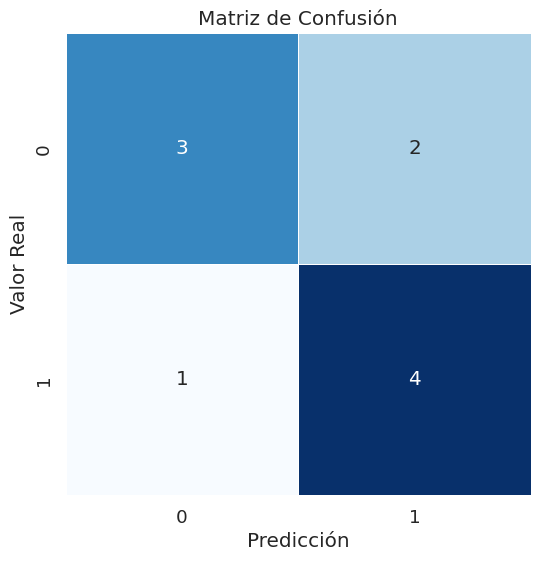

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ejemplo de datos de clasificación
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Crear una figura para la matriz de confusión
plt.figure(figsize=(6, 6))

# Usar seaborn para crear una representación visual de la matriz
sns.set(font_scale=1.2)  # Ajustar el tamaño de fuente
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", linewidths=.5, cbar=False)

# Configuración de etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la matriz de confusión
plt.show()


________________________________________________________________________
________________________________________________________________________

### **Exactitud (Accuracy):**
Esta métrica se utiliza comúnmente en problemas de clasificación. Mide la proporción de predicciones correctas realizadas por el modelo en relación con el número total de predicciones. Sin embargo, la exactitud puede ser engañosa en conjuntos de datos desequilibrados, donde una clase es mucho más frecuente que las demás.




 La exactitud mide la proporción de predicciones correctas realizadas por el modelo en relación con el número total de predicciones. Es decir, cuántos de los casos el modelo clasificó correctamente en comparación con el total de casos.
 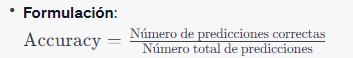

________________________________________________________________________
________________________________________________________________________
### **Precisión (Precision):**
La precisión se refiere a la proporción de predicciones positivas correctas con respecto al número total de predicciones positivas realizadas por el modelo. Es útil cuando es importante evitar falsos positivos, es decir, cuando las consecuencias de una predicción incorrecta son graves.



La precisión se refiere a la proporción de predicciones positivas correctas con respecto al número total de predicciones positivas realizadas por el modelo. Es útil cuando es importante evitar falsos positivos, es decir, cuando las consecuencias de una predicción incorrecta son graves.

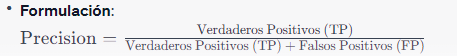

________________________________________________________________________
________________________________________________________________________
### **Recuperación (Recall):**
El recall, también conocido como sensibilidad o tasa de verdaderos positivos, mide la proporción de ejemplos positivos que el modelo ha identificado correctamente con respecto al número total de ejemplos positivos en los datos. Es útil cuando es importante evitar falsos negativos, es decir, cuando no queremos perder ningún caso positivo.

El recall mide la proporción de ejemplos positivos que el modelo ha identificado correctamente con respecto al número total de ejemplos positivos en los datos. Es útil cuando es importante evitar falsos negativos, es decir, cuando no queremos perder ningún caso positivo.

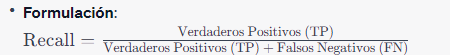

________________________________________________________________________
________________________________________________________________________
### **F1-Score:**
El F1-score es una métrica que combina precisión y recuperación en una sola puntuación. Se utiliza cuando se necesita encontrar un equilibrio entre la precisión y la recuperación. Es especialmente útil cuando las clases están desequilibradas.

El F1-score combina precisión y recall en una sola puntuación. Se utiliza cuando se necesita encontrar un equilibrio entre la precisión y la recuperación. Es especialmente útil cuando las clases están desequilibradas.


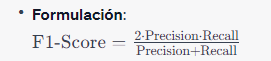

________________________________________________________________________
________________________________________________________________________
### **Muestreo en codigo**


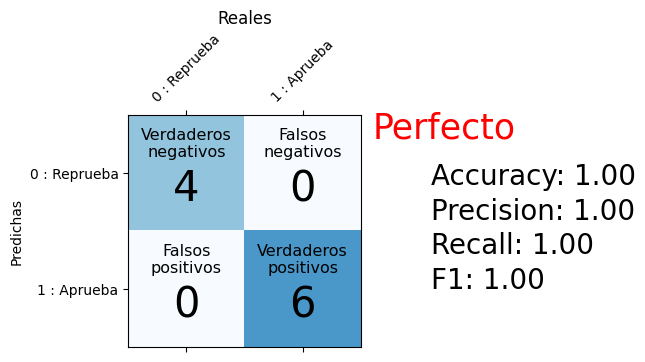

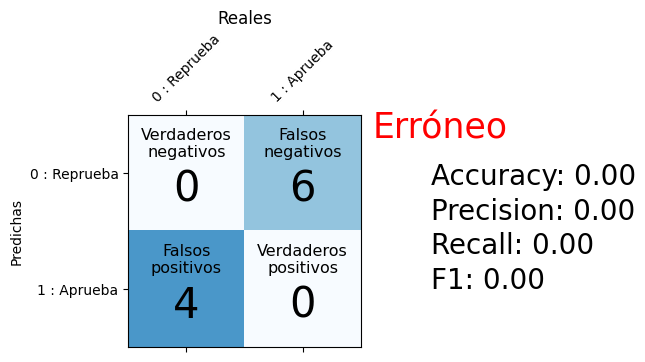

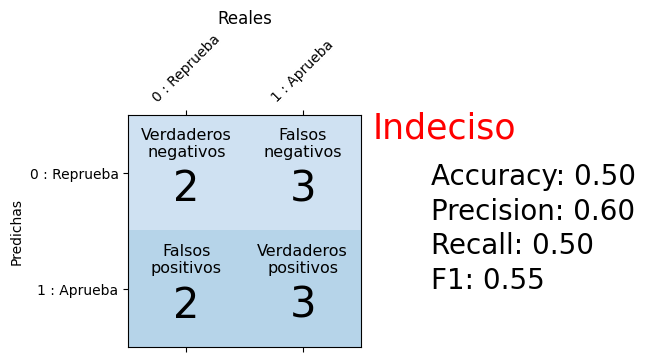

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


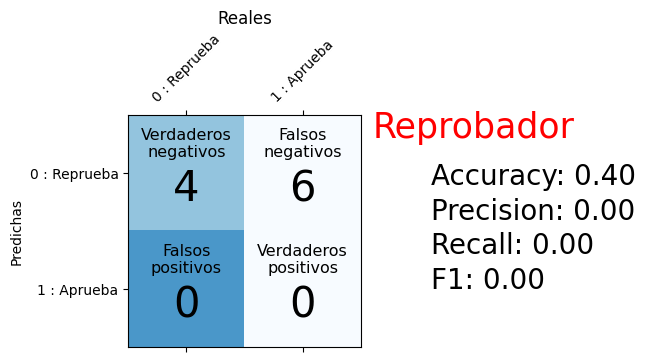

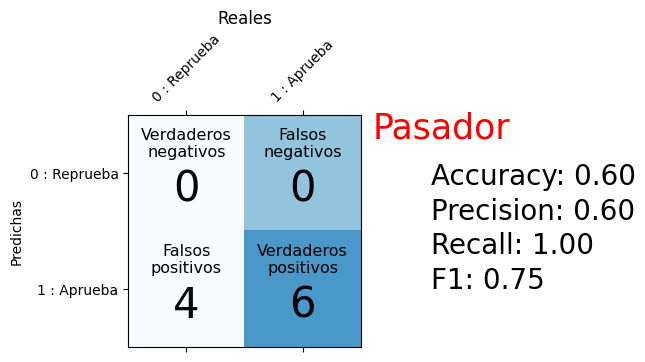

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Dominio del Ejemplo - Calificaciones en Exámenes
#
# 0 : Reprueba      40% Reprueba
# 1 : Aprueba       60% Aprueba

def metricas(clases_reales, clases_predichas):
    """ Calcular las métricas utilizando sklearn """
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)
    precision = precision_score(clases_reales, clases_predichas)
    recall = recall_score(clases_reales, clases_predichas)
    f1 = f1_score(clases_reales, clases_predichas)
    return matriz, accuracy, precision, recall, f1

def visualiza_metricas(clases_reales, clases_predichas, titulo):
    """ Visualiza la matriz de confusión y métricas """

    #Código para calcular las métricas y matriz de confusión

    matriz, accuracy, precision, recall, f1 = \
                    metricas(clases_reales, clases_predichas)

    #Código de matplotlib para graficar
    plt.figure(figsize=(3, 3))
    matriz = pd.DataFrame(matriz,
                          columns=["0 : Reprueba", "1 : Aprueba"])
    plt.matshow(matriz, cmap="Blues", vmin=0, vmax=10, fignum=1)
    plt.title("Reales")
    plt.ylabel("Predichas")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1: %0.2f" % f1, fontsize=20)
    plt.show()
    print("\n" * 10)

print("\n" * 10)

# Dominio del Ejemplo - Calificaciones en Exámenes
#
# 0 : Reprueba      40% Reprueba
# 1 : Aprueba       60% Aprueba

clases_reales = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

# Clasificador perfecto
clases_predichas = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
visualiza_metricas(clases_reales, clases_predichas, "Perfecto")

# Clasificador totalmente erróneo
clases_predichas = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
visualiza_metricas(clases_reales, clases_predichas, "Erróneo")

# Clasificador indeciso
clases_predichas = [1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
visualiza_metricas(clases_reales, clases_predichas, "Indeciso")

# Clasificador reprobador
clases_predichas = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
visualiza_metricas(clases_reales, clases_predichas, "Reprobador")

# Clasificador pasador
clases_predichas = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
visualiza_metricas(clases_reales, clases_predichas, "Pasador")


##########################################################################
##########################################################################
##########################################################################
##########################################################################
__________________________________________________________________
__________________________________________________________________
_____________________________________________________________________
___________________________________________________________________
______________________________________________________________________________
_____________________________________________________________________
_________________________________________________________________
#**CLASE 2**

###################################################################
__________________________________________________________________
_________________________________________________________________
_________________________________________________________________
________________________________________________________________
## ALGORITMOS (Modelos)


_________________________________________________________________
________________________________________________________________
###**k-Means: (NO SUPERVISADO)**

####**Definición:**
k-Means es un algoritmo de agrupamiento (clustering) que se utiliza para dividir un conjunto de datos en grupos o clústeres basados en la similitud de características. El valor de "k" en k-Means representa el número de clústeres que se deben formar.
####**Explicación:**
El algoritmo k-Means funciona asignando puntos de datos a uno de los k clústeres de manera que la suma de las distancias cuadradas entre los puntos y el centroide (punto central) de su clúster sea mínima. Los centroides se actualizan iterativamente hasta converger a una solución. k-Means es ampliamente utilizado en análisis de datos y segmentación de clientes, entre otras aplicaciones de clustering.



####**Sentido Matemático:**
k-Means es un algoritmo de agrupamiento que busca minimizar la suma de las distancias cuadradas entre los puntos de datos y los centroides de los clústeres. Matemáticamente, se puede expresar como un problema de optimización donde se minimiza la siguiente función de costo:



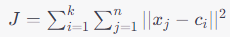

J = ∑ i=1 to k ∑ j=1 to n ||x_j - c_i||^2

Donde J es la función de costo, k es el número de clústeres, n es el número de puntos de datos, x_j es un punto de datos, y c_i es el centroide del clúster i. El objetivo es encontrar los centroides c_i que minimizan esta suma de distancias.


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Generar datos de ejemplo
np.random.seed(0)
X = np.random.randn(100, 2)

# Crear un modelo de k-Means con 3 clústeres
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Etiquetar los puntos de datos con los clústeres asignados
labels = kmeans.labels_

# Imprimir las etiquetas asignadas a cada punto
print("Etiquetas de los clústeres:", labels)


Etiquetas de los clústeres: [2 2 2 2 1 1 2 2 2 0 1 0 2 0 2 1 0 1 2 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 2 0
 0 0 1 1 0 2 2 1 1 1 2 1 1 2 1 1 0 2 2 1 1 2 2 0 1 0 1 2 1 1 1 2 0 1 1 2 1
 0 1 0 0 0 0 1 2 1 0 2 2 0 1 0 1 0 0 0 1 1 1 0 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


_________________________________________________________________
________________________________________________________________
###**k-Nearest Neighbors (k-NN): (SUPERVISADO)**

####**Definición:**
k-Nearest Neighbors (k-NN) es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión. Funciona asignando una etiqueta o valor a un punto de datos basándose en la mayoría de las etiquetas (en clasificación) o en el promedio de los valores (en regresión) de sus k vecinos más cercanos en el espacio de características.
####**Explicación:**
Para clasificar un punto de datos desconocido con k-NN, se encuentra su k vecinos más cercanos en función de alguna medida de distancia (generalmente la distancia euclidiana) y se determina la etiqueta más común entre esos vecinos. k-NN es un algoritmo simple y versátil, pero su rendimiento puede verse afectado por la elección adecuada de k y la calidad de los datos.



#### **Sentido Matemático:**
k-NN se basa en la idea de que los puntos de datos similares deberían tener etiquetas similares. Matemáticamente, para clasificar un punto de datos desconocido, se calcula la distancia entre ese punto y todos los demás puntos en el conjunto de entrenamiento. Luego, se seleccionan los k puntos más cercanos (vecinos) y se asigna al punto desconocido la etiqueta que es la más común entre esos k vecinos. La distancia generalmente se calcula usando la distancia euclidiana o alguna otra medida de distancia.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar un conjunto de datos (en este caso, el conjunto de datos Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de k-NN con k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Imprimir las predicciones
print("Predicciones:", y_pred)


Predicciones: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


###################################################################
__________________________________________________________________
_________________________________________________________________
_________________________________________________________________
________________________________________________________________
##**Árbol de Decisión:**

###**Definición:**
Un árbol de decisión es un modelo de aprendizaje automático que se utiliza tanto para problemas de clasificación como de regresión. Representa una estructura de árbol donde cada nodo interno representa una decisión basada en una característica del conjunto de datos, y cada hoja representa una etiqueta (en clasificación) o un valor (en regresión).
###**Explicación:**
Los árboles de decisión se construyen dividiendo repetidamente el conjunto de datos en subconjuntos más pequeños en función de la característica que mejor separa las clases o reduce la varianza en el caso de regresión. Se sigue dividiendo hasta que se alcanza un criterio de parada, como la profundidad máxima o un número mínimo de ejemplos por hoja. Los árboles de decisión son fáciles de interpretar y visualizar, lo que los hace populares en aplicaciones donde la explicabilidad del modelo es importante. Además, se pueden usar en conjunto con métodos como Random Forest y Gradient Boosting para mejorar su rendimiento.

### **Sentido Matemático:**
Un árbol de decisión es una estructura jerárquica que se construye dividiendo los datos en función de características y criterios de decisión. Matemáticamente, en cada nodo del árbol, se selecciona una característica y un umbral para dividir los datos en dos subconjuntos. La elección de la característica y el umbral se basa en criterios como la ganancia de información o la impureza de Gini en el caso de la clasificación, o la reducción de la varianza en el caso de la regresión. El objetivo es dividir los datos de manera que se minimice la impureza o se maximice la información en cada nodo del árbol.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text

# Cargar un conjunto de datos (en este caso, el conjunto de datos Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de Árbol de Decisión
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = tree_classifier.predict(X_test)

# Imprimir las predicciones
print("Predicciones:", y_pred)

# Imprimir la estructura del árbol de decisión
tree_rules = export_text(tree_classifier, feature_names=iris.feature_names)
print("Árbol de Decisión:\n", tree_rules)


Predicciones: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Árbol de Decisión:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   | 

ALGO


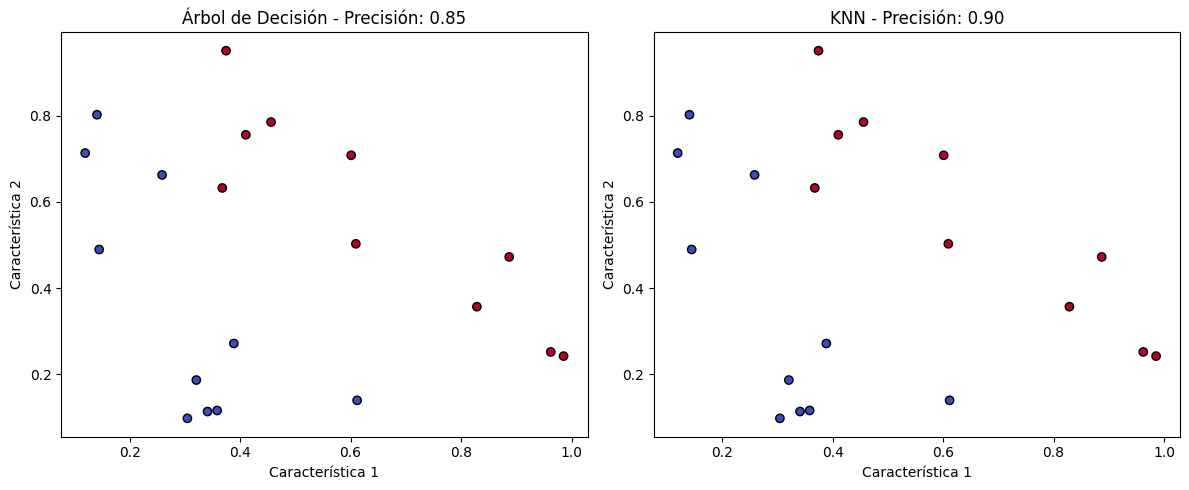

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Configuración para reproducibilidad
np.random.seed(42)

# Generar datos simulados
X = np.random.rand(100, 2)  # Dos características aleatorias para cada instancia
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Clase 1 si la suma de las características es mayor que 1, de lo contrario, Clase 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular la precisión del modelo de árbol de decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Entrenar un modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# Calcular la precisión del modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Visualizar los resultados
plt.figure(figsize=(12, 5))

# Gráfico para el modelo de árbol de decisión
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='o')
plt.title(f'Árbol de Decisión - Precisión: {accuracy_tree:.2f}')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Gráfico para el modelo KNN
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='o')
plt.title(f'KNN - Precisión: {accuracy_knn:.2f}')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


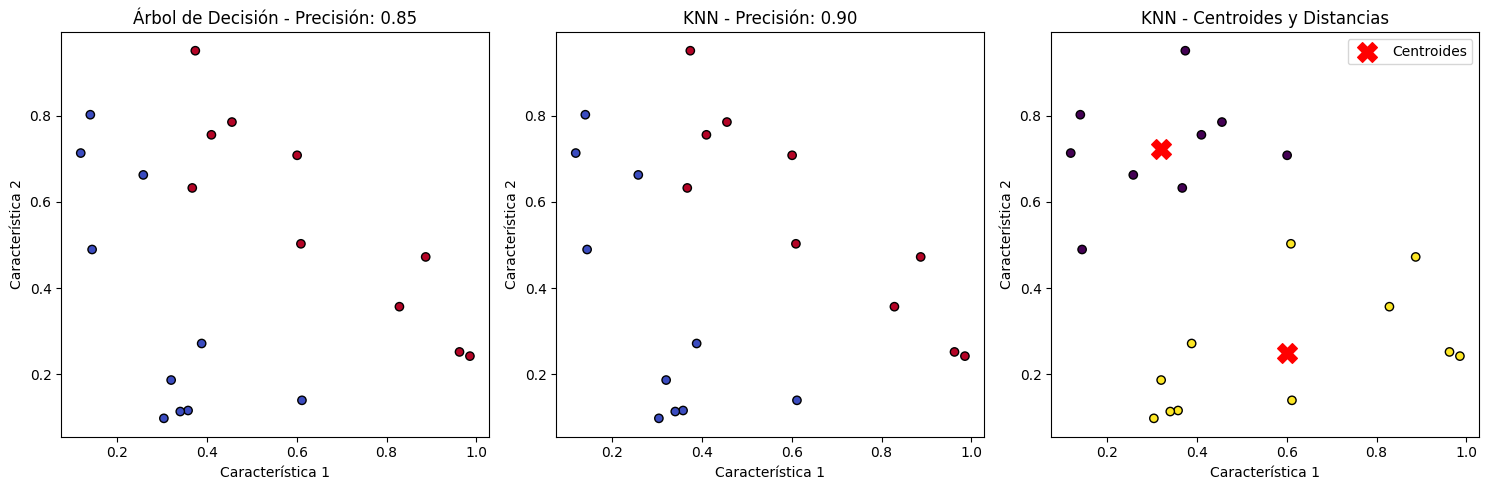

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import graphviz
from sklearn.tree import export_graphviz

# Configuración para reproducibilidad
np.random.seed(42)

# Generar datos simulados
X = np.random.rand(100, 2)  # Dos características aleatorias para cada instancia
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Clase 1 si la suma de las características es mayor que 1, de lo contrario, Clase 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular la precisión del modelo de árbol de decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Visualizar el árbol de decisión
dot_data = export_graphviz(tree_model, out_file=None, feature_names=['Característica 1', 'Característica 2'], class_names=['Clase 0', 'Clase 1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(filename='decision_tree', format='png', cleanup=True)
graph.view()

# Entrenar un modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# Calcular la precisión del modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Visualizar los resultados
plt.figure(figsize=(15, 5))

# Gráfico para el modelo de árbol de decisión
plt.subplot(1, 3, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='o')
plt.title(f'Árbol de Decisión - Precisión: {accuracy_tree:.2f}')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Gráfico para el modelo KNN
plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='o')
plt.title(f'KNN - Precisión: {accuracy_knn:.2f}')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Gráfico para visualizar centroides y distancias en KNN
plt.subplot(1, 3, 3)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_test)
y_kmeans = kmeans.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_kmeans, cmap='viridis', edgecolors='k', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.title('KNN - Centroides y Distancias')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.tight_layout()
plt.show()


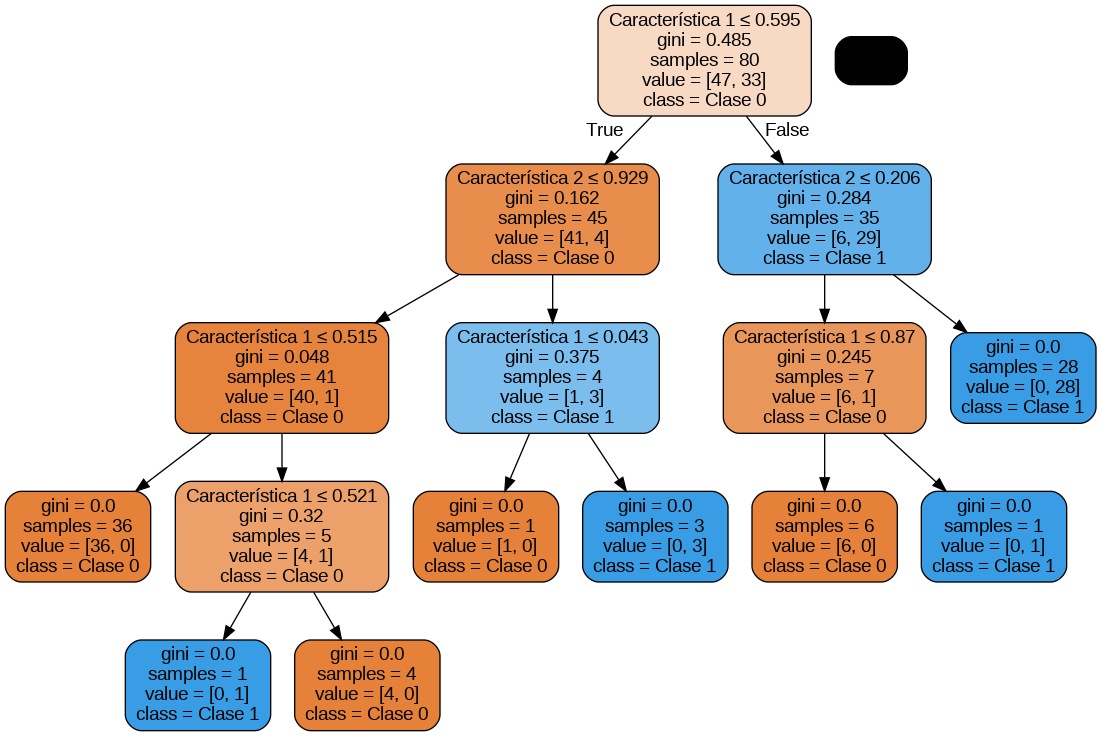

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import pydotplus
from IPython.display import Image

# Configuración para reproducibilidad
np.random.seed(42)

# Generar datos simulados
X = np.random.rand(100, 2)  # Dos características aleatorias para cada instancia
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Clase 1 si la suma de las características es mayor que 1, de lo contrario, Clase 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular la precisión del modelo de árbol de decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Visualizar el árbol de decisión con pydotplus
dot_data = export_graphviz(tree_model, out_file=None, feature_names=['Característica 1', 'Característica 2'], class_names=['Clase 0', 'Clase 1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
